Задача 1

(1 возможный балл)
В файле 3.graph.txt задан ориентированный граф - в каждой строке через символ табуляции записана пара вершин u<tab>v, соответствующая ребру из u в v в графе.

Постройте график ассортативности dnn(d) данного графа. С помощью вызова curve_fit без специальных параметров аппроксимируйте эту функцию функцией вида c⋅dδ. Необходимо использовать все пары (d,dnn(d)). Постройте график и полученную аппроксимацию в log-log координатах. Является ли граф ассортативным?

Обратите внимание, что в графе есть петли и кратные ребра.

Ответом на задачу является единственное число - оптимальное значение параметра δ, округленное до сотых.




In [217]:
import networkx as nx
filename = "3.graph.txt"

debug = False

if debug:
    G = nx.MultiDiGraph()
    # 1
    G.add_edge(1, 1)
    G.add_edge(1, 1)
    G.add_edge(1, 2)
    G.add_edge(1, 2)
    G.add_edge(1, 5)

    # 2
    G.add_edge(2, 2)

    # 3
    G.add_edge(3, 2)
    G.add_edge(3, 4)
    G.add_edge(3, 4)
    G.add_edge(3, 5)
    G.add_edge(3, 5)

    # 4
    G.add_edge(4, 3)
    G.add_edge(4, 3)
    G.add_edge(4, 3)
    G.add_edge(4, 4)
    G.add_edge(4, 4)
    G.add_edge(4, 4)
    G.add_edge(4, 5)

    # 5
    G.add_edge(5, 1)
    G.add_edge(5, 1)
    G.add_edge(5, 1)
    G.add_edge(5, 3)
    G.add_edge(5, 3)
    G.add_edge(5, 4)
    G.add_edge(5, 4)
else:
    G = nx.read_edgelist(filename, nodetype=int, create_using=nx.MultiDiGraph()) 

print G.number_of_nodes()
print G.number_of_edges()
print type(G)


2000
4000
<class 'networkx.classes.multidigraph.MultiDiGraph'>


In [218]:
from collections import defaultdict
def get_X(G):
    result = defaultdict(int)
    for u, v in G.edges():
        result[(G.degree(u), G.degree(v))] += 1
        result[(G.degree(v), G.degree(u))] += 1
    return result

X = get_X(G)

In [221]:
def get_dnn(G, X):
    result = dict()
    degree_values = set(G.degree().values())
    for d1 in degree_values:
        sum1 = 0.0
        sum2 = 0.0
        for j1, j2 in X.keys():
            if j1 == d1:
                X1 = X[(d1, j2)]
                sum1+= j2 * X1
                sum2+= X1
        if sum2 != 0:        
            result[d1] = float(sum1) / float(sum2)
    return result
dnn = get_dnn(G, X)
print "len dnn.keys() = ", len(dnn.keys())
print "len dnn.values() = ", len(dnn.values())
print "degres = ",  len(set(G.degree().values()))
print dnn

len dnn.keys() =  41
len dnn.values() =  41
degres =  41
{128: 14.4296875, 2: 334.81276445698165, 3: 223.11940298507463, 4: 152.9954128440367, 5: 167.9320754716981, 6: 166.7093023255814, 7: 131.06428571428572, 8: 180.1375, 9: 102.70707070707071, 10: 80.89090909090909, 11: 19.727272727272727, 12: 85.81944444444444, 13: 124.76923076923077, 14: 91.9047619047619, 15: 85.4, 16: 55.4375, 17: 76.76470588235294, 18: 29.833333333333332, 19: 69.44736842105263, 20: 80.9, 21: 91.02380952380952, 22: 18.681818181818183, 23: 99.56521739130434, 24: 50.708333333333336, 25: 52.48, 26: 20.865384615384617, 29: 41.689655172413794, 31: 74.70967741935483, 32: 10.71875, 35: 35.68571428571428, 36: 36.44444444444444, 41: 30.70731707317073, 43: 54.53488372093023, 49: 25.6734693877551, 59: 25.864406779661017, 85: 19.152941176470588, 92: 17.26086956521739, 1120: 8.19375, 103: 14.03883495145631, 114: 14.75438596491228, 249: 10.068273092369479}


In [227]:
def f(d, c, b):
    return float(c) * (d ** b)

from scipy.optimize import curve_fit
import numpy as np

print type(dnn.keys())
print len(dnn.keys())
print len(dnn.values())

print dnn
print dnn.keys()
print dnn.values()
             

xdata = np.array(dnn.keys())
ydata = np.array(dnn.values())

popt, pcov = curve_fit(f, xdata, ydata)
c, b = popt
print c, b

# from scipy.optimize import curve_fit
# import numpy as np
# def f(x, a, b):
# #     print type(x)
#     res = a*x*x + b
#     print a, b, res
#     return res
# # 2x^2 + 1
# popt, pcov = curve_fit(f, np.array([1, 2, 3, 4, 5]), np.array([3, 9, 19, 33, 51]))
# print popt

# a = np.array([1, 2])
# print a ** 2


<type 'list'>
41
41
{128: 14.4296875, 2: 334.81276445698165, 3: 223.11940298507463, 4: 152.9954128440367, 5: 167.9320754716981, 6: 166.7093023255814, 7: 131.06428571428572, 8: 180.1375, 9: 102.70707070707071, 10: 80.89090909090909, 11: 19.727272727272727, 12: 85.81944444444444, 13: 124.76923076923077, 14: 91.9047619047619, 15: 85.4, 16: 55.4375, 17: 76.76470588235294, 18: 29.833333333333332, 19: 69.44736842105263, 20: 80.9, 21: 91.02380952380952, 22: 18.681818181818183, 23: 99.56521739130434, 24: 50.708333333333336, 25: 52.48, 26: 20.865384615384617, 29: 41.689655172413794, 31: 74.70967741935483, 32: 10.71875, 35: 35.68571428571428, 36: 36.44444444444444, 41: 30.70731707317073, 43: 54.53488372093023, 49: 25.6734693877551, 59: 25.864406779661017, 85: 19.152941176470588, 92: 17.26086956521739, 1120: 8.19375, 103: 14.03883495145631, 114: 14.75438596491228, 249: 10.068273092369479}
[128, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 31, 32,

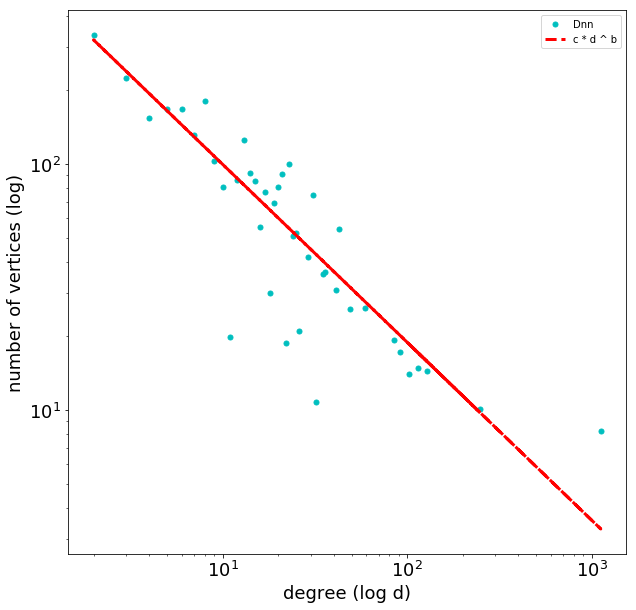

In [235]:
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = 10, 10
plt.loglog(dnn.keys(), dnn.values(), ls='None', marker='.', markersize=10,
           color='c', label=u"Dnn")
estimated = [f(d, c, b) for d in dnn.keys()]
plt.loglog(dnn.keys(),
           estimated,
           ls='--',color='r',linewidth=3,label=u"c * d ^ b")

plt.xlabel(u"degree (log d)", fontsize=18)
plt.ylabel(u"number of vertices (log)", fontsize=18)
plt.legend()